In [3]:
import os
import re
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy.fft import fft, ifft
import numpy as np
from numpy import diff
import cmath
import cv2
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from skimage.filters import difference_of_gaussians, window, butterworth
from scipy.fft import fftn, fftshift
import time
from scipy.signal import argrelextrema
from natsort import natsorted, ns
from tifffile import imwrite
from PIL import Image
from skimage.morphology import reconstruction
from skimage.exposure import rescale_intensity
import numpy as np
import imageio as iio
import matplotlib.image as mpimg
from matplotlib import cm
from skimage.io import imread, imshow
import cv2
from skimage.transform import hough_line, hough_line_peaks

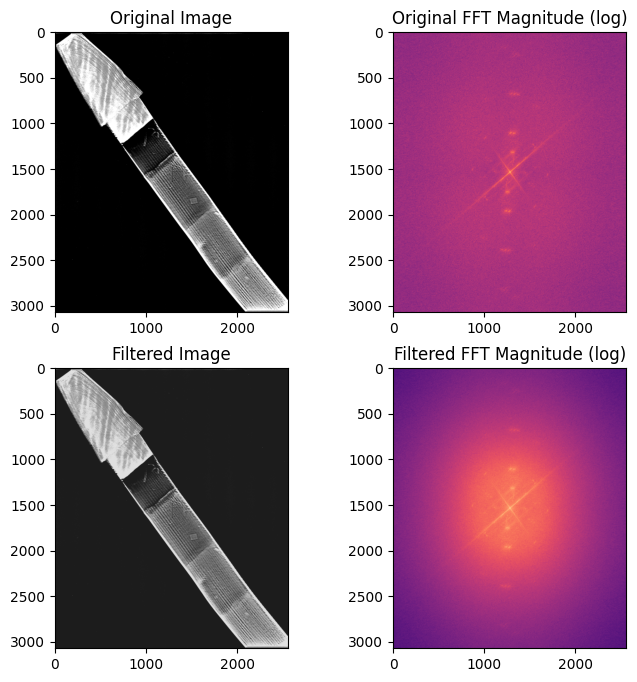

In [9]:

# import image
imgpath ='C:\\Adaptix\\DowtyPrismBlade2ndHalf\\DowtyPrismBlade2ndHalf0007.tif'
image = mpimg.imread(imgpath)




# apply window and low pass filter
wimage = image * window('hann', image.shape)  # window image to improve FFT
lpfiltered_image = butterworth(image, cutoff_frequency_ratio= 0.15, order=3.0, high_pass=False, squared_butterworth=True, npad = 0)  
# picked cutoff = 0.5 using nyquist theorem (cutoff is the fraction of the max freq); order control the transition width, with higher values leading to a sharper transition between the passband and stopband.
lpfiltered_wimage = lpfiltered_image * window('hann', image.shape)

bpfiltered_image = difference_of_gaussians(image, 1.5)
bpfiltered_wimage = bpfiltered_image * window('hann', image.shape)
#saveimage
# save image from the array `img_out' (stored in the form of a numbered array)
save_path = 'C:\\Adaptix\\DowtyPrismBlade2ndHalf\\FilteredDowtyPrismBlade2ndHalf0007.tif'
i = Image.fromarray(bpfiltered_image) 
i.save(save_path)


# do dft of image
im_f_mag = fftshift(np.abs(fftn(wimage)))
fim_f_mag = fftshift(np.abs(fftn(lpfiltered_wimage)))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(np.log(im_f_mag), cmap='magma')
ax[0, 1].set_title('Original FFT Magnitude (log)')
ax[1, 0].imshow(lpfiltered_image, cmap='gray')
ax[1, 0].set_title('Filtered Image')
ax[1, 1].imshow(np.log(fim_f_mag), cmap='magma')
ax[1, 1].set_title('Filtered FFT Magnitude (log)')
plt.show()

# do inverse dft of image